# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [4]:
df = pd.read_csv("polynomial_classification_dataset_v2.csv")
df.head(5)

,data1,data2,output
0,0.398428,-1.921901,1
1,-0.143698,-1.574740,1
2,0.982027,2.828371,0
3,2.620978,-1.914138,0
4,1.395433,2.126311,0


# Check Our Data

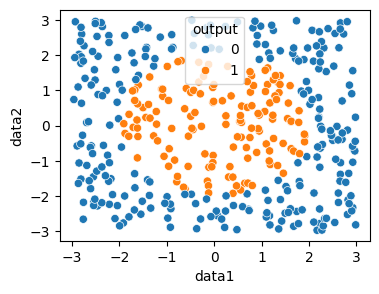

In [6]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="data1", y="data2", data=df, hue ="output" )
plt.show()

# Split Indep and Dep

In [8]:
x = df.iloc[:,:-1]
y= df["output"]

# Polynomial 

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
pf = PolynomialFeatures(degree = 2)
pf.fit(x)

PolynomialFeatures()

In [12]:
pf.transform(x)

array([[ 1.        ,  0.39842784, -1.92190135,  0.15874475, -0.76573901,
         3.69370479],
       [ 1.        , -0.14369759, -1.57474005,  0.020649  ,  0.22628635,
         2.47980623],
       [ 1.        ,  0.98202699,  2.82837056,  0.96437701,  2.77753624,
         7.99968005],
       ...,
       [ 1.        , -2.21059389, -1.05194444,  4.88672534,  2.32542195,
         1.1065871 ],
       [ 1.        ,  1.29494979,  1.42414246,  1.67689495,  1.84419298,
         2.02818176],
       [ 1.        ,  2.45419512, -0.14389122,  6.02307371, -0.35313714,
         0.02070468]])

In [13]:
# Convert Array into Dataframe
x = pd.DataFrame(pf.transform(x))

In [14]:
x

,0,1,2,3,4,5
0,1.0,0.398428,-1.921901,0.158745,-0.765739,3.693705
1,1.0,-0.143698,-1.574740,0.020649,0.226286,2.479806
2,1.0,0.982027,2.828371,0.964377,2.777536,7.999680
3,1.0,2.620978,-1.914138,6.869528,-5.016915,3.663925
4,1.0,1.395433,2.126311,1.947232,2.967123,4.521197
...,...,...,...,...,...,...
395,1.0,0.789361,-0.070553,0.623091,-0.055692,0.004978
396,1.0,1.398678,-2.099708,1.956301,-2.936816,4.408774
397,1.0,-2.210594,-1.051944,4.886725,2.325422,1.106587
398,1.0,1.294950,1.424142,1.676895,1.844193,2.028182


# Shape After Polynomial Features

In [16]:
x.shape

(400, 6)

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test , y_train,  y_test =train_test_split(x, y, test_size = 0.2, random_state = 42)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

# Train Model

In [24]:
lr.fit(x_train, y_train)

LogisticRegression()

# Accuracy

In [26]:
lr.score(x_test, y_test)*100

97.5